In [2]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
dataset = pd.read_csv(url)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


KMeans - это алгоритм кластеризации, используемый для разделения набора данных на предопределенное количество кластеров. Он основан на минимизации суммы квадратов расстояний между точками данных и центроидами кластеров. Основные шаги алгоритма KMeans следующие:

1. Инициализация: Выбираются случайные центроиды для каждого кластера.
2. Присваивание: Каждая точка данных присваивается к ближайшему центроиду на основе расстояния.
3. Пересчет центроидов: Центроиды пересчитываются путем вычисления среднего значения всех точек данных, принадлежащих кластеру.
4. Повторение: Шаги 2 и 3 повторяются до сходимости алгоритма, когда изменения центроидов становятся незначительными или число итераций достигает предела.

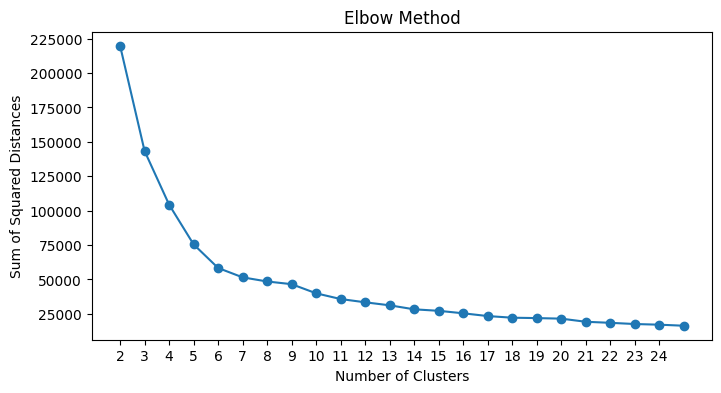

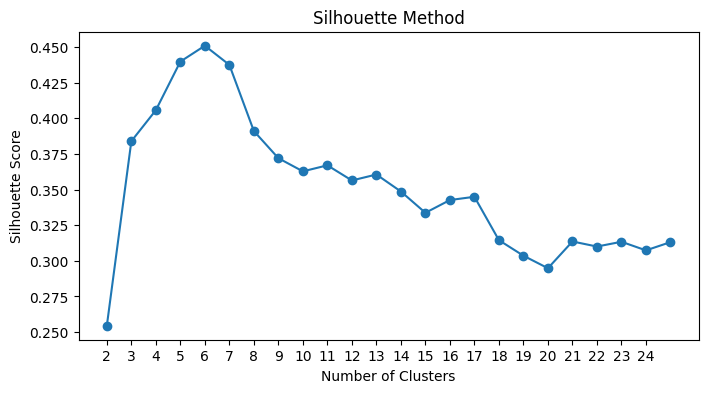

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Выбор диапазона количества кластеров
min_clusters = 2
max_clusters = 25

# Списки для сохранения значений суммы квадратов расстояний и коэффициента силуэта
inertia = []
silhouette = []

# Выполнение KMeans для разного количества кластеров
for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(dataset.iloc[:, 2:])  # Используем столбцы "Age", "Annual Income (k$)" и "Spending Score (1-100)"
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(dataset.iloc[:, 2:], kmeans.labels_))

# Визуализация метода локтя
plt.figure(figsize=(8, 4))
plt.plot(range(min_clusters, max_clusters+1), inertia, marker='o')
plt.xticks(np.arange(min_clusters, max_clusters, step=1)) 
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Визуализация коэффициента силуэта
plt.figure(figsize=(8, 4))
plt.plot(range(min_clusters, max_clusters+1), silhouette, marker='o')
plt.xticks(np.arange(min_clusters, max_clusters, step=1)) 
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


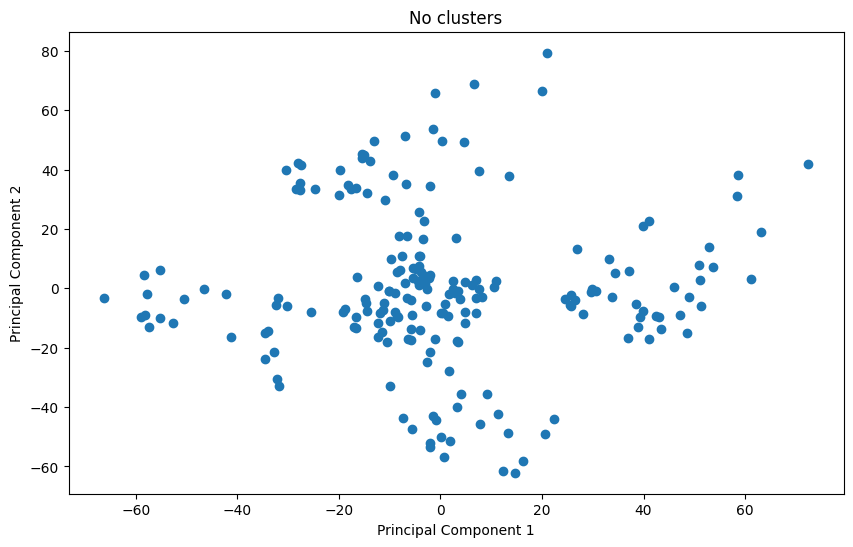

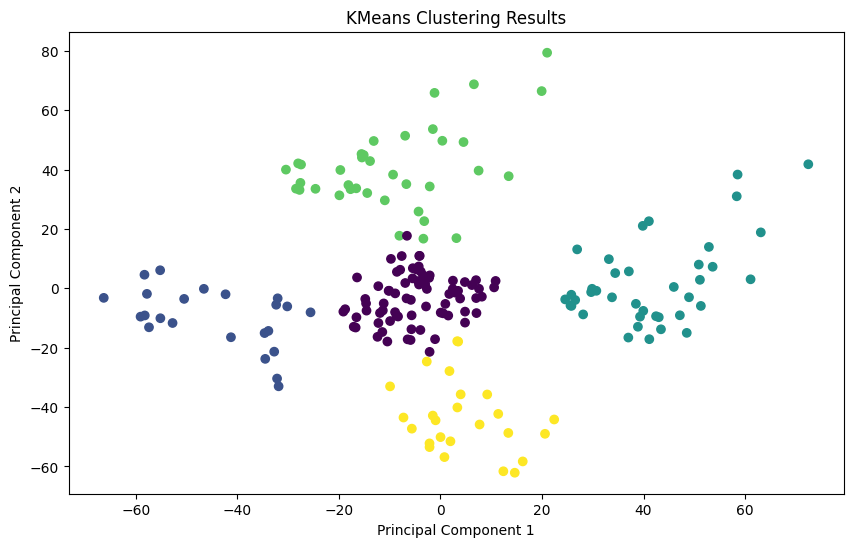

In [39]:
from sklearn.decomposition import PCA

# Выполнение KMeans с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(dataset.iloc[:, 2:])  # Используем столбцы "Age", "Annual Income (k$)" и "Spending Score (1-100)"

# Применение PCA для снижения размерности до 2 компонентов
pca = PCA(n_components=2)
pca_data = pca.fit_transform(dataset.iloc[:, 2:])

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('No clusters')
plt.show()

# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()


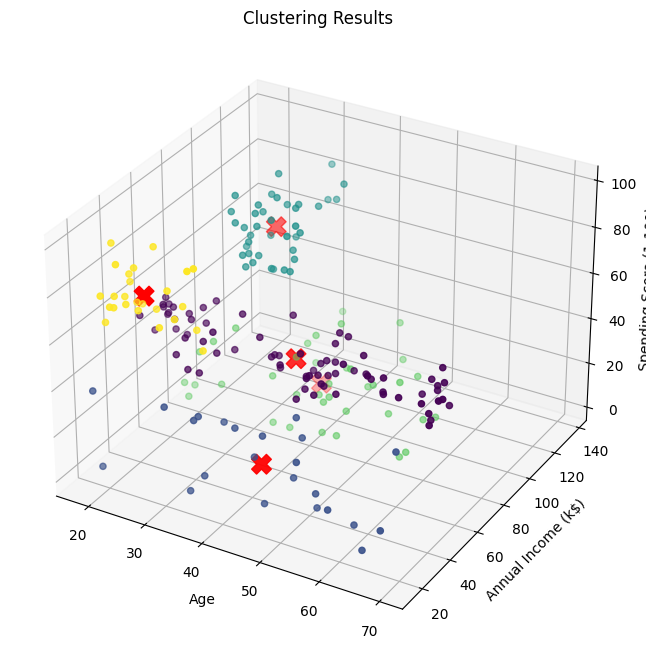

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Clustering Results')
plt.show()

In [9]:
import plotly.express as px

# Добавляем метки кластеров к исходному набору данных
dataset['Cluster'] = kmeans.labels_

# Визуализация интерактивного 3D-графика
fig = px.scatter_3d(dataset, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster', symbol='Cluster', opacity=0.8, size_max=8)
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Annual Income (k$)', zaxis_title='Spending Score (1-100)'), title='Clustering Results')
fig.show()

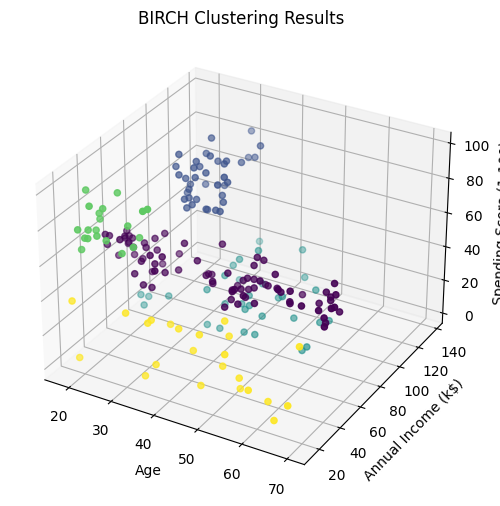

In [30]:
from sklearn.cluster import Birch

# Метод BIRCH
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(dataset.iloc[:, 2:])

# Визуализация кластеров методом BIRCH
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=birch_labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('BIRCH Clustering Results')
plt.show()


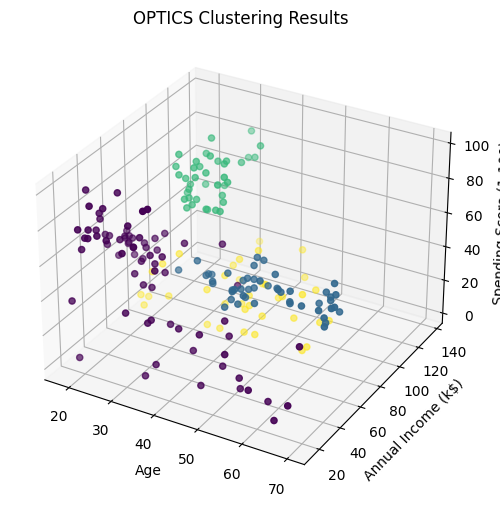

In [37]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.iloc[:, 2:])

# Метод OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.15)
optics.fit(scaled_data)

# Получение меток кластеров
optics_labels = optics.labels_

# Визуализация кластеров методом OPTICS
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=optics_labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('OPTICS Clustering Results')
plt.show()


Отличия методов перечислены в таблице: https://scikit-learn.org/stable/modules/clustering.html

Методы отличаются по:
* Входным параметрам
* Масштабируемости (по числу классов и по числу семплов)
* Примеру использования
* Метрике